In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import os

from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from bs4 import BeautifulSoup
!pip install contractions
import contractions
from textblob import TextBlob
import spacy

     |████████████████████████████████| 284 kB 2.3 MB/s 
     |████████████████████████████████| 321 kB 40.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=102814 sha256=a19e5de6272ca48ddf03c259a64e9ac7b5c107fe5d8b30233fa8e64f11b459fd
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


# Let's import train and test set

In [2]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [9]:
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 120

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Real or not Disaster tweets')

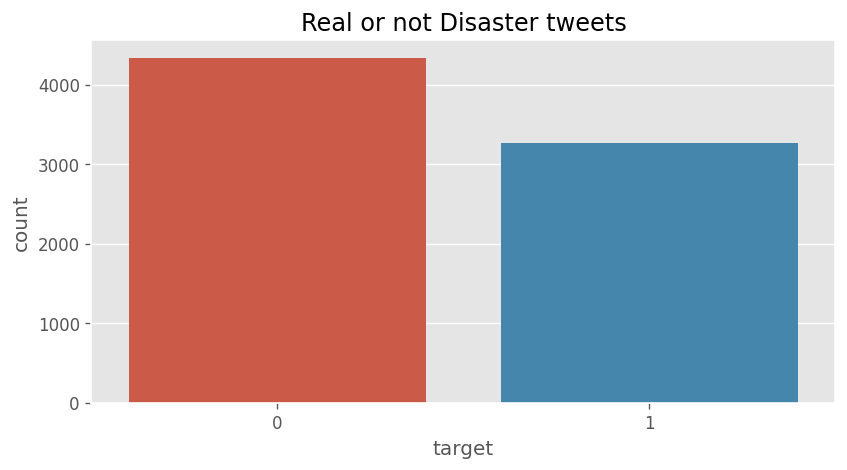

In [10]:
sns.countplot('target', data = train)
plt.title('Real or not Disaster tweets')

In [11]:
# Functions for clean data

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
global stopwords

def get_words_counts(tweets):
        length = len(str(tweets).split())
        return length
    
def get_chars_counts(tweets):
        string = tweets.split()
        x = ''.join(string)
        return len(x)
    
def get_average_word_length(tweets):
        count = get_chars_counts(tweets)/get_words_counts(tweets)
        return count
    
def get_stopwords_count(tweets):
        global stopwords
        stopwords = len([t for t in tweets.split() if t in stopwords])
        return stopwords
    
def get_hashtags_tags(tweets):
        hashtags = len([t for t in tweets.split() if t.startswith('#')])
        return hashtags
        
def get_email_tags(tweets):
        email = len([t for t in tweets.split() if t.startwith('@')])
        return email
    
def get_digit_counts(tweets):
        digits = re.findall(r'[0-9,.]+', tweets)
        return digits
    
def get_uppercase_units(tweets):
        uppercase = len([t for t in tweets.split() if t.isupper()])
        return uppercase

In [12]:
# With this function we can get some features for build a bit EDA

def get_features(df):
    if type(df) == pd.core.frame.DataFrame:
        df['words_counts'] = df['text'].apply(lambda x: get_words_counts(x))
        df['char_counts'] = df['text'].apply(lambda x: get_chars_counts(x))
        df['average_word_length'] = df['text'].apply(lambda x: get_average_word_length(x))
#        df['stopwords_counts'] = df['text'].apply(lambda x: get_stopwords_count(x))
        df['hashtags_counts'] = df['text'].apply(lambda x: get_hashtags_tags(x))
#        df['email_counts'] = df['text'].apply(lambda x: get_email_tags(x))
        df['digits_counts'] = df['text'].apply(lambda x: get_digit_counts(x))
        df['uppercase_counts'] = df['text'].apply(lambda x: get_uppercase_units(x))
        
    else:
        print('ERROR')
        
    return df

In [13]:
train = pd.DataFrame(train)

In [14]:
train = get_features(train)

In [15]:
train

,id,keyword,location,text,target,words_counts,char_counts,average_word_length,hashtags_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,57,4.384615,1,[],1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,32,4.571429,0,[.],0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,112,5.090909,0,[.],0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,57,7.125000,1,"[13,000]",0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,72,4.500000,2,[],0
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,73,6.636364,0,"[., 5]",0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,106,5.300000,0,"[., .]",0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,58,7.250000,0,"[1.94, 01, 04, 5, ., ., 8]",2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,119,6.263158,0,"[., .]",0


# EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='char_counts', ylabel='Density'>

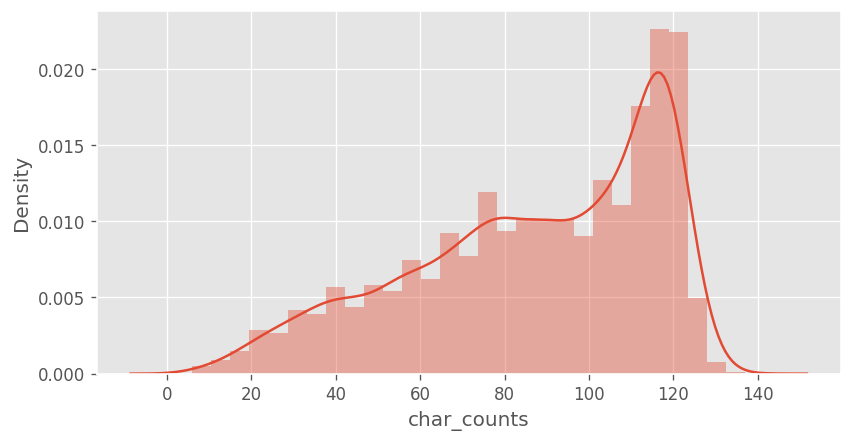

In [16]:
sns.distplot(train['char_counts'])

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

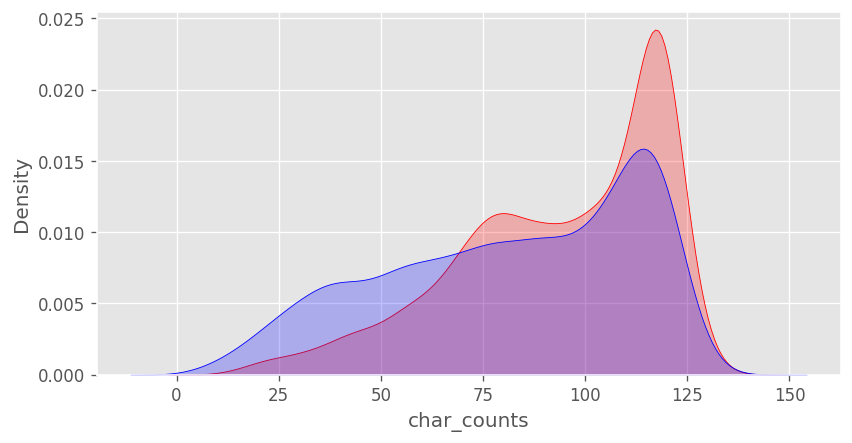

In [17]:
sns.kdeplot(train[train['target'] == 1]['char_counts'], shade=True, color='red')
sns.kdeplot(train[train['target'] == 0]['char_counts'], shade=True, color= 'blue')

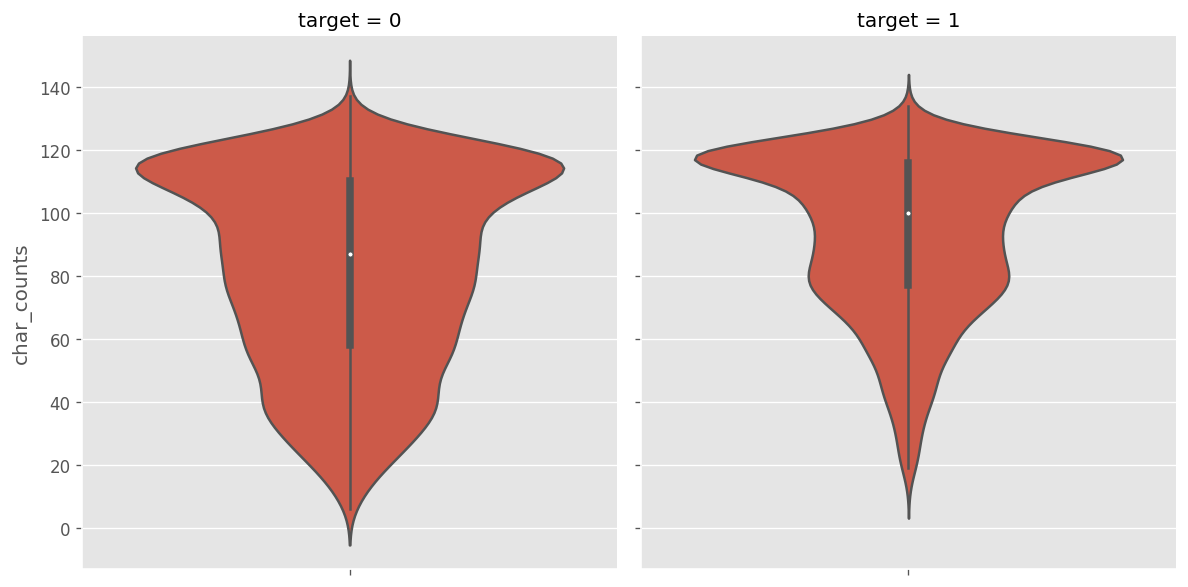

In [18]:
sns.catplot(y='char_counts', data=train, kind='violin', col='target')

# Data Cleaning

In [19]:
def remove_tweet_username(df):
    return re.sub('@[^\s]+','', df)

def make_lower(df):
    return df.lower()

def cont_exp(df):
    return contractions.fix(df)

def make_string(df):
    return str(df)

def remove_url(df):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , df)

def remove_email(df):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", df)

#Retweets
def remove_rt(df):
    df = str(df)
    return re.sub(r'\brt\b', "", df).strip()

def remove_html(df):
    return BeautifulSoup(df, 'lxml').get_text().strip()


def remove_dots(df):
    dot_pattern = re.compile(r'\.{1,}')
    single_dot = dot_pattern.sub(' ', df)
    return single_dot

def remove_special_chars(df):
    df = re.sub(r'[^\w]+', " ", df)
    df = ' '.join(df.split())
    
    return df

def make_base(df):
    df = str(df)
    x_list = []
    doc = nlp(df)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

def spelling_correction(df):
    df = TextBlob(df).correct()
    return df

def resub(df):
    return re.sub("(.)\\1{2,}", "\\1", df)



def get_clean_data(df):
    df = remove_url(df)
    df = remove_email(df)
#    df = remove_special_chars(df)
    df = remove_html(df)
#    df = remove_dots(df)
#    df = make_base(df)
#    df = spelling_correction(df).raw_sentences[0]
    df = make_lower(df)
    df = make_string(df)
    df = cont_exp(df)
    df = remove_rt(df)
    df = resub(df)                             
    df = remove_tweet_username(df)
    
    return df

In [20]:
train['text'] = train['text'].apply(get_clean_data)

In [21]:
test['text'] = test['text'].apply(get_clean_data)

In [22]:
train['text'] = train['text'].apply(remove_special_chars)
test['text'] = test['text'].apply(remove_special_chars)

In [23]:
train['text'].head(20)

0     our deeds are the reason of this earthquake ma...
1                 forest fire near la ronge sask canada
2     all residents asked to shelter in place are be...
3     13 0 people receive wildfires evacuation order...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update california hwy 20 closed in b...
6     flood disaster heavy rain causes flash floodin...
7     I am on top of the hill and i can see a fire i...
8     there is an emergency evacuation happening now...
9     I am afraid that the tornado is coming to our ...
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah wait a...
12    raining flooding florida tampabay tampa 18 or ...
13                flood in bago myanmar we arrived bago
14    damage to school bus on 80 in multi car crash ...
15                                       what is up man
16                                        i love fruits
17                                     summer is

In [24]:
from gensim.parsing.preprocessing import STOPWORDS

In [25]:
STOPWORDS.difference()

all_stopwords_gensim = STOPWORDS
sw_list = {"not"}
all_stopwords_gensim = STOPWORDS.difference(sw_list)

In [26]:
# Use Gensim

from gensim.parsing.preprocessing import remove_stopwords

train['text'] = train['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords)


In [27]:
train.text

0                   deeds reason earthquake allah forgive
1                        forest near la ronge sask canada
2       residents asked shelter place notified officer...
3       13 0 people receive wildfires evacuation order...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    giant cranes holding bridge collapse nearby homes
7609    control wild fires california northern state t...
7610                 m1 94 01 04 utc 5km s volcano hawaii
7611    police investigating e bike collided car littl...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [28]:
# trying to remove all digits from a columns

train['text'] = train['text'].str.replace('\d+', '')
test['text'] = test['text'].str.replace('\d+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [29]:
train['text'].head(20)

0                 deeds reason earthquake allah forgive
1                      forest near la ronge sask canada
2     residents asked shelter place notified officer...
3       people receive wildfires evacuation orders c...
4     got sent photo ruby alaska smoke wildfires pou...
5     rockyfire update california hwy  closed direct...
6     flood disaster heavy rain causes flash floodin...
7                                          I hill woods
8        emergency evacuation happening building street
9                          I afraid tornado coming area
10                            people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa   days...
13                      flood bago myanmar arrived bago
14          damage school bus  multi car crash breaking
15                                                  man
16                                          love fruits
17                                        summer

# WordClouds

In [30]:
def get_word_freqs(df, col):
    text = ' '.join(df[col])
    text = text.split()
    freq = pd.Series(text).value_counts()
    return freq

In [31]:
real_data = get_word_freqs(train[train['target']==1], 'text')
real_data = ' '.join(real_data.index)
real_data

's û_ news disaster california suicide police people killed like hiroshima storm pm crash fires families train I emergency bomb buildings mh nuclear attack video wildfire accident bombing old burning northern dead legionnaires bomber car war typhoon homes year obama new japan atomic today fatal years collapse debris forest man mass watch water malaysia near latest home m severe earthquake confirmed injured city û time oil world spill warning th floods army migrants derailment thunderstorm going outbreak wreckage evacuation weather flood ûªs saudi flooding investigators area missing state death bridge rescuers wounded mosque suspect wild hundreds kills charged day island devastated report anniversary murder boy drought damage affected terrorist air reunion got heat lives airplane rain yr deaths truck pkk plane county collision school life detonated w says officials live terrorism massacre refugees rd calgary airport boat caused survivors flames hit razed times look evacuated displaced r

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

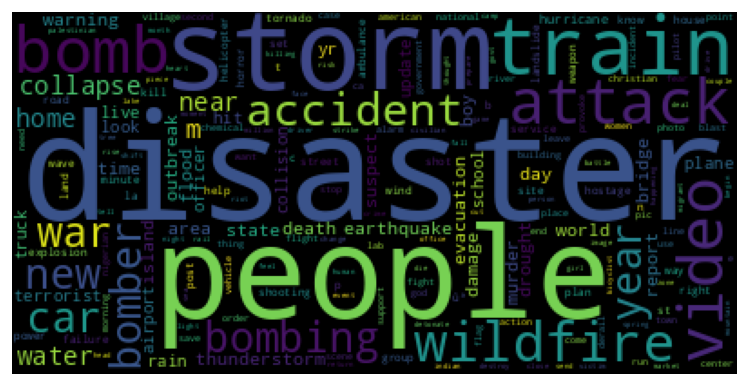

In [32]:
wordcloud = WordCloud().generate(real_data)
plt.imshow(wordcloud)
plt.axis('off')
plt.imshow

In [33]:
not_real_data = get_word_freqs(train[train['target']==0], 'text')
not_real_data = ' '.join(not_real_data.index)
not_real_data

'I s like û_ new body going want video people got love let know time day emergency good man w think lol world life way news burning û best need work reddit help read black great right wreck feel hot god ûªs content today fear look bags cross ass x night year fucking bag death come getting bloody check disaster harm explode shit screaming ruin liked school smoke home wrecked face bad panic buildings coming head dead sinking watch military crash crush self police long car stop better twister m loud blood war traumatised free curfew storm fall fuck hope little o blew soon live deluge screamed nuclear panicking said battle hazard song destroy army game attack run bleeding girl destruction screams ebay bang drown armageddon flattened bomb trouble oh blown things inundated burned big lava real blazing survive sunk collide desolation quarantine electrocute injury thank shoulder catastrophe twitter summer stock high meltdown destroyed p movie flames phone bagging demolish services looks lot ob

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

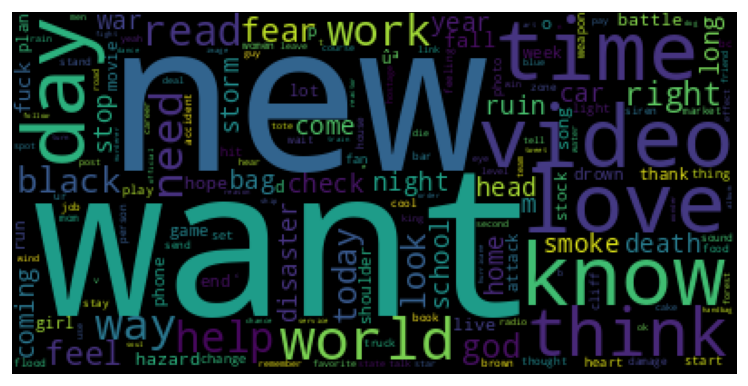

In [34]:
wordcloud = WordCloud().generate(not_real_data)
plt.imshow(wordcloud)
plt.axis('off')
plt.imshow

# TF_IDF

In [35]:
text = train['text']
y = train['target']

In [36]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [37]:
X.shape

(7613, 13745)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7, stratify=y)

## Support Vector Machines

In [39]:
from sklearn.svm import LinearSVC

In [40]:
clf_svm = LinearSVC()

In [41]:
def run_SVM(clf_svm, X_train, X_test, y_train, y_test):
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_test)
    
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [42]:
run_SVM(clf_svm, X_train, X_test, y_train, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1086
           1       0.79      0.68      0.73       818

    accuracy                           0.79      1904
   macro avg       0.79      0.77      0.78      1904
weighted avg       0.79      0.79      0.78      1904



## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

In [44]:
def run_LR(clf_lr, X_train, X_test, y_train, y_test):
    clf_lr.fit(X_train, y_train)
    y_pred = clf_lr.predict(X_test)
    
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [45]:
run_LR(clf_lr, X_train, X_test, y_train, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1086
           1       0.86      0.61      0.71       818

    accuracy                           0.79      1904
   macro avg       0.81      0.77      0.77      1904
weighted avg       0.80      0.79      0.78      1904



## K_Nearest_Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

In [47]:
def run_knn(clf_knn, X_train, X_test, y_train, y_test):
    clf_knn.fit(X_train, y_train)
    y_pred = clf_knn.predict(X_test)
    
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [48]:
run_knn(clf_knn, X_train, X_test, y_train, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1086
           1       0.89      0.26      0.41       818

    accuracy                           0.67      1904
   macro avg       0.76      0.62      0.59      1904
weighted avg       0.74      0.67      0.61      1904



## Multinominal Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB()

In [50]:
def run_mnb(clf_mnb, X_train, X_test, y_train, y_test):
    clf_mnb.fit(X_train, y_train)
    y_pred = clf_mnb.predict(X_test)
    
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [51]:
run_mnb(clf_mnb, X_train, X_test, y_train, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1086
           1       0.82      0.66      0.73       818

    accuracy                           0.79      1904
   macro avg       0.80      0.77      0.78      1904
weighted avg       0.79      0.79      0.79      1904



## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

In [53]:
def run_tree(clf_tree, X_train, X_test, y_train, y_test):
    clf_tree.fit(X_train, y_train)
    y_pred = clf_tree.predict(X_test)
    
    print()
    print('Classification Reprot:')
    print(classification_report(y_test, y_pred))

In [54]:
run_tree(clf_tree, X_train, X_test, y_train, y_test)


Classification Reprot:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1086
           1       0.69      0.67      0.68       818

    accuracy                           0.73      1904
   macro avg       0.73      0.72      0.72      1904
weighted avg       0.73      0.73      0.73      1904



## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier()

In [56]:
def run_forest(clf_forest, X_train, X_test, y_train, y_test):
    clf_forest.fit(X_train, y_train)
    y_pred = clf_forest.predict(X_test) 
    
    print()
    print("Classificiation Report:")
    print(classification_report(y_test, y_pred))

In [57]:
run_forest(clf_forest, X_train, X_test, y_train, y_test)


Classificiation Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1086
           1       0.82      0.63      0.71       818

    accuracy                           0.78      1904
   macro avg       0.79      0.76      0.77      1904
weighted avg       0.78      0.78      0.77      1904



In [58]:
random_forest_score = clf_forest.score(X_test, y_test)

In [59]:
random_forest_score

0.7788865546218487

In [60]:
models_default_tfidf = {'Support Vector Machines': clf_svm.score(X_test, y_test),
          'Logistic Regression': clf_lr.score(X_test, y_test),
          'KNearest Neightbors': clf_knn.score(X_test, y_test),
          'Multinominal Naive Bayes': clf_mnb.score(X_test, y_test),
          'Decision Tree': clf_tree.score(X_test, y_test),
          'Random Forest Classifier': clf_forest.score(X_test, y_test)}

In [61]:
models_default_tfidf

{'Support Vector Machines': 0.7851890756302521,
 'Logistic Regression': 0.789390756302521,
 'KNearest Neightbors': 0.6680672268907563,
 'Multinominal Naive Bayes': 0.7909663865546218,
 'Decision Tree': 0.7316176470588235,
 'Random Forest Classifier': 0.7788865546218487}

<AxesSubplot:>

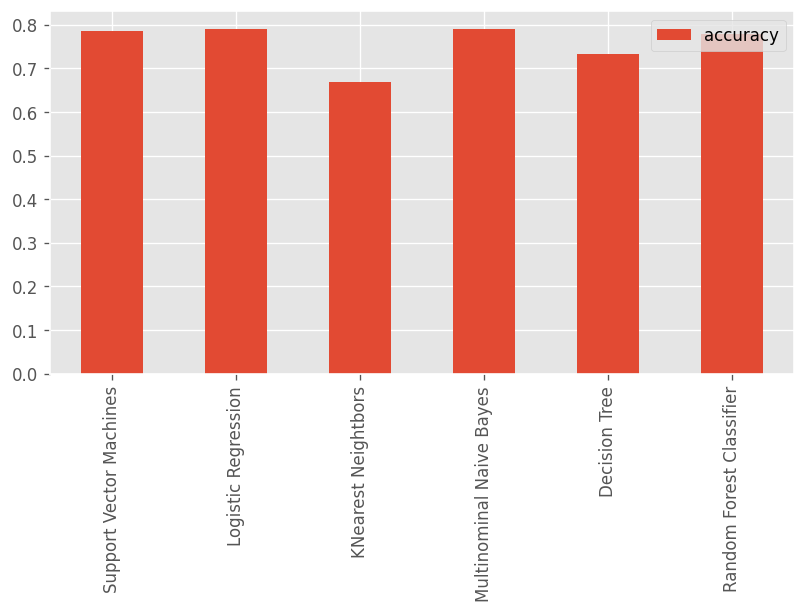

In [62]:
default_models_compare = pd.DataFrame(models_default_tfidf, index=['accuracy'])
default_models_compare.T.plot.bar()

## Word2Vec

In [63]:
import en_core_web_lg

In [64]:
nlp = en_core_web_lg.load()

In [65]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [66]:
train['vectors'] = train['text'].apply(lambda x: get_vec(x))

In [67]:
train.head()

,id,keyword,location,text,target,words_counts,char_counts,average_word_length,hashtags_counts,digits_counts,uppercase_counts,vectors
0,1,NaN,NaN,deeds reason earthquake allah forgive,1,13,57,4.384615,1,[],1,"[-0.577874, -0.020427203, -0.153596, -0.104262..."
1,4,NaN,NaN,forest near la ronge sask canada,1,7,32,4.571429,0,[.],0,"[0.0059129945, -0.12560566, -0.195046, -0.3924..."
2,5,NaN,NaN,residents asked shelter place notified officer...,1,22,112,5.090909,0,[.],0,"[0.07983147, 0.06994864, -0.0071826326, -0.000..."
3,6,NaN,NaN,people receive wildfires evacuation orders c...,1,8,57,7.125000,1,"[13,000]",0,"[-0.19421284, 0.1704717, -0.02339843, -0.21402..."
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,16,72,4.500000,2,[],0,"[-0.15872057, -0.08627854, 0.112908565, -0.068..."


In [68]:
X = train['vectors'].to_numpy()
X = X.reshape(-1, 1)

In [69]:
X.shape

(7613, 1)

In [70]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [71]:
X.shape

(7613, 300)

In [72]:
X

array([[-0.577874  , -0.0204272 , -0.153596  , ...,  0.322171  ,
        -0.04134401, -0.20528519],
       [ 0.00591299, -0.12560566, -0.195046  , ..., -0.13940184,
        -0.26227203,  0.13546816],
       [ 0.07983147,  0.06994864, -0.00718263, ...,  0.12075873,
         0.10999563, -0.07356182],
       ...,
       [ 0.20367701,  0.15621029,  0.02428143, ...,  0.07529014,
        -0.01228427,  0.06978985],
       [ 0.00729172,  0.0888634 , -0.28466085, ..., -0.06633175,
         0.03403912,  0.10538907],
       [-0.08109076,  0.261985  ,  0.07463737, ..., -0.3299342 ,
        -0.14810582,  0.17813051]], dtype=float32)

In [73]:
### Normalization

from sklearn.preprocessing import normalize

X = normalize(X)
X

array([[-0.13712625, -0.00484726, -0.03644747, ...,  0.07644937,
        -0.0098107 , -0.04871302],
       [ 0.00153096, -0.03252115, -0.05050027, ..., -0.03609318,
        -0.06790607,  0.03507469],
       [ 0.02037159,  0.01784967, -0.00183288, ...,  0.03081551,
         0.02806895, -0.01877168],
       ...,
       [ 0.06110809,  0.04686691,  0.00728502, ...,  0.02258888,
        -0.00368558,  0.02093866],
       [ 0.00204144,  0.02487876, -0.07969546, ..., -0.01857066,
         0.00952981,  0.02950539],
       [-0.02173158,  0.07020958,  0.02000213, ..., -0.08841935,
        -0.039691  ,  0.04773735]], dtype=float32)

In [74]:
y = train['target']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7, stratify=y)

In [76]:
def word2vec_models(clf, X_train, X_test, y_train, y_test):
    print('SVM MODEL:')
    run_SVM(clf_svm, X_train, X_test, y_train, y_test)
    print('LOGISTIC REGRESSION MODEL:')
    run_LR(clf_lr, X_train, X_test, y_train, y_test)
    print('KNEAREST NEIGHBORS MODEL:')
    run_knn(clf_knn, X_train, X_test, y_train, y_test)
    #run_mnb(clf_mnb, X_train, X_test, y_train, y_test)
    print('DECISION TREE MODEL:')
    run_tree(clf_tree, X_train, X_test, y_train, y_test)
    print('RANDOM FOREST MODEL:')
    run_forest(clf_forest, X_train, X_test, y_train, y_test)
    
    return word2vec_models
    

In [77]:
clf_list = [run_SVM, run_LR, run_knn, run_mnb, run_tree, run_forest]

In [78]:
word2vec_models(clf_list, X_train, X_test, y_train, y_test)

SVM MODEL:

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1086
           1       0.81      0.72      0.76       818

    accuracy                           0.80      1904
   macro avg       0.80      0.79      0.80      1904
weighted avg       0.80      0.80      0.80      1904

LOGISTIC REGRESSION MODEL:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1086
           1       0.81      0.72      0.76       818

    accuracy                           0.81      1904
   macro avg       0.81      0.80      0.80      1904
weighted avg       0.81      0.81      0.81      1904

KNEAREST NEIGHBORS MODEL:

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1086
           1       0.75      0.74      0.74       818

    accuracy                           0.78   

<function __main__.word2vec_models(clf, X_train, X_test, y_train, y_test)>

In [79]:
models_default_word2vec = {'Support Vector Machines': clf_svm.score(X_test, y_test),
          'Logistic Regression': clf_lr.score(X_test, y_test),
          'KNearest Neightbors': clf_knn.score(X_test, y_test),
          'Decision Tree': clf_tree.score(X_test, y_test),
          'Random Forest Classifier': clf_forest.score(X_test, y_test)}

In [80]:
models_default_word2vec

{'Support Vector Machines': 0.8046218487394958,
 'Logistic Regression': 0.8072478991596639,
 'KNearest Neightbors': 0.7804621848739496,
 'Decision Tree': 0.7121848739495799,
 'Random Forest Classifier': 0.7862394957983193}

In [81]:
models_default_tfidf

{'Support Vector Machines': 0.7851890756302521,
 'Logistic Regression': 0.789390756302521,
 'KNearest Neightbors': 0.6680672268907563,
 'Multinominal Naive Bayes': 0.7909663865546218,
 'Decision Tree': 0.7316176470588235,
 'Random Forest Classifier': 0.7788865546218487}

# Hyperparameter tuning

In [82]:
# Logistic Regression?

In [83]:
print(clf_lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [84]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': np.logspace(-2,2,8),
                 'random_state': [7],
                 'penalty': ['l2', 'l1'],
                 'solver': ['liblinear','sag', 'saga']}

grid_lr = GridSearchCV(clf_lr, param_grid_lr, cv=10, n_jobs = -1)

grid_lr.fit(X_train, y_train)


CPU times: user 2.96 s, sys: 192 ms, total: 3.15 s
Wall time: 4min 59s


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 3.72759372e-02, 1.38949549e-01, 5.17947468e-01,
       1.93069773e+00, 7.19685673e+00, 2.68269580e+01, 1.00000000e+02]),
                         'penalty': ['l2', 'l1'], 'random_state': [7],
                         'solver': ['liblinear', 'sag', 'saga']})

In [85]:
grid_lr.best_params_

{'C': 1.9306977288832496,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'liblinear'}

In [86]:
grid_lr.best_score_

0.8095975051464037

In [87]:
#####################################################################

In [88]:
#####################################################################

In [89]:
test['vectors'] = test['text'].apply(lambda x: get_vec(x))

In [90]:
X_test

array([[ 0.03350716,  0.10963875, -0.06815884, ..., -0.01361607,
        -0.03623772,  0.07216221],
       [-0.00629352, -0.01697773, -0.00193981, ...,  0.02892116,
        -0.00328152,  0.05115028],
       [-0.06333891,  0.0532884 , -0.01681001, ..., -0.00849164,
        -0.07185034,  0.02545742],
       ...,
       [-0.06714123,  0.06508432,  0.03729696, ..., -0.00342227,
        -0.0099838 ,  0.00059184],
       [-0.06458659, -0.05909936,  0.05361837, ..., -0.07255008,
        -0.00974781,  0.00835531],
       [-0.03527272,  0.04835235, -0.02847619, ...,  0.00325826,
         0.0006298 ,  0.00481668]], dtype=float32)

In [91]:
testX = test['vectors'].to_numpy()

In [92]:
testX = testX.reshape(-1, 1)

In [93]:
testX.shape

(3263, 1)

In [94]:
testX = np.concatenate(np.concatenate(testX, axis = 0), axis=0).reshape(-1, 300)

In [95]:
# from sklearn.preprocessing import normalize

X_norm = normalize(testX)


In [96]:
X_norm

array([[-0.01692557,  0.07268876, -0.02284683, ...,  0.01480602,
         0.04205063,  0.0011334 ],
       [ 0.03202211,  0.01890971, -0.06639466, ...,  0.0212068 ,
         0.00115649,  0.04785782],
       [ 0.02419373, -0.00233273, -0.05893976, ...,  0.03497584,
        -0.01928171, -0.01854718],
       ...,
       [ 0.01162454,  0.04527759,  0.00487701, ...,  0.01821063,
        -0.04297464,  0.09428275],
       [-0.00011461,  0.06013081, -0.00820731, ..., -0.02630499,
        -0.00451705, -0.0285181 ],
       [ 0.02075939, -0.01771831,  0.02461145, ..., -0.03411167,
         0.00695188, -0.00198968]], dtype=float32)

In [97]:
X_norm.shape

(3263, 300)

In [98]:
df = pd.DataFrame(test['id'])

In [99]:
df

,id
0,0
1,2
2,3
3,9
4,11
...,...
3258,10861
3259,10865
3260,10868
3261,10874


In [100]:
final = grid_lr.predict(X_norm)

In [101]:
df['target'] = final

In [102]:
df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [103]:
df.to_csv('Disaster_tweet.csv', index=False)

In [104]:
check = pd.read_csv('Disaster_tweet.csv')

In [105]:
check.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [106]:
check.target.value_counts()

0    2030
1    1233
Name: target, dtype: int64